In [82]:
import pandas as pd
import platform
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster

In [1]:
from station import Station
from userInfo import UserInfo
station_app = Station()
user1 = UserInfo.geocoding('대구광역시 산격동 글로벌플라자')

In [2]:
station_app.get_tabel_names()

['seoul_loc', '년도별_valuecounts', '차량등록', '충전소', '충전소별_충전구분']

In [3]:
user1.get_user_info()

사용자 현재 위치 : 대구광역시 산격동 글로벌플라자
위도 : 35.891887, 경도 : 128.61133700069712


In [107]:
# 그래프 그리는 함수
def drawGraph(data, num=0):
    if platform.system()=='Windows':
        plt.rc('font',family='Malgun Gothic')
    else:
        plt.rc('font',family='AppleGothic')
    plt.rcParams["figure.figsize"]=(13,7)#그래프 사이즈 설정
    if num == 0:
        plt.plot(data.year, data.counts)
        plt.xlabel('<연도별>',size=11)#X축 이름
        plt.xticks(size=9)
    elif num == 1:
        data.plot(kind='bar',color='#FFFF00')#막대 그래프
        plt.xlabel('<구역별>',size=11)#X축 이름
        plt.xticks(rotation=20,size=9)
    plt.ylabel('<전기차 수>',size=11)#Y축 이름
    plt.yticks(size=9)
    plt.show()

1. 연도별 등록된 전기차 수

In [4]:
yearDf = station_app.load_DB('년도별_valuecounts')

In [49]:
yearDf = yearDf.drop(index=(17))

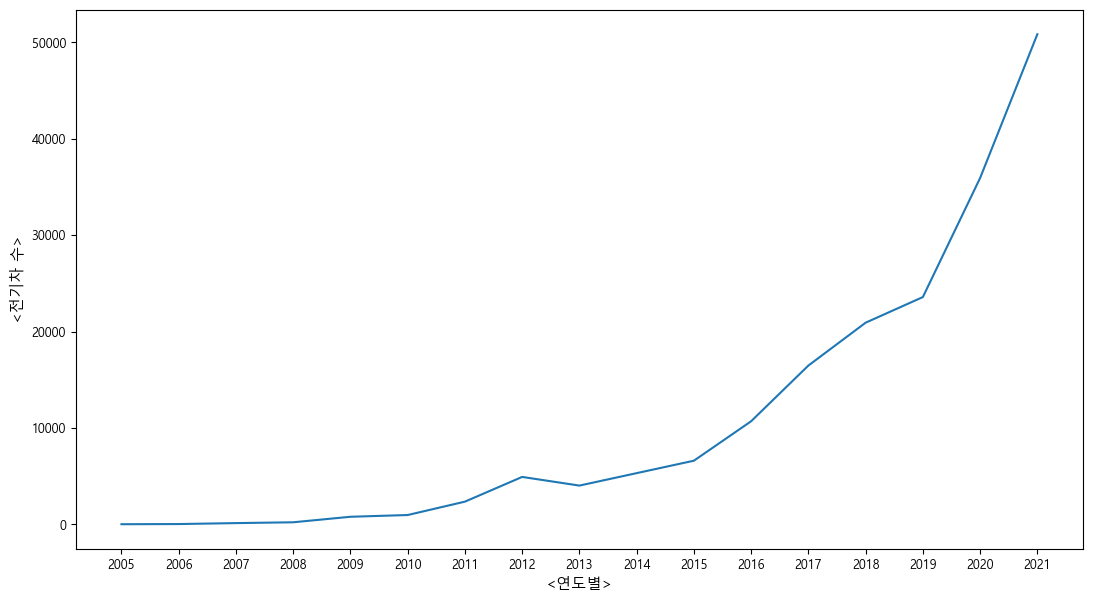

In [108]:
drawGraph(yearDf)

2. 구역별 전기차 수

In [6]:
feulDf = station_app.load_DB('차량등록').iloc[:,1:]

In [12]:
feulDf['연료'].unique()

array(['하이브리드(휘발유+전기)', '전기', '하이브리드(경유+전기)', '하이브리드(LPG+전기)', '수소',
       '하이브리드(CNG+전기)'], dtype=object)

In [14]:
feulDf = feulDf[feulDf['연료']=='전기'].copy()

In [19]:
feulDf.head()

,행정동,연료
9,서울특별시 강남구 개포1동,전기
40,서울특별시 광진구 자양2동,전기
47,서울특별시 광진구 자양2동,전기
57,서울특별시 송파구 가락2동,전기
58,서울특별시 송파구 가락2동,전기


In [21]:
# 주소 전체를 구역별로 나눠 줌
totalDf=feulDf['행정동'].str.split(' ',expand=True)#문자열을 3개로 나눠서 별도의 프레임으로 확장
totalDf=totalDf.drop([0,2],axis=1)#'구'만 저장
totalDf.columns = ['행정동']

In [23]:
totalDf['연료'] = feulDf['연료']

In [24]:
totalDf.head()

,행정동,연료
9,강남구,전기
40,광진구,전기
47,광진구,전기
57,송파구,전기
58,송파구,전기


In [25]:
# 구역별 값 개수 확인
totalDf['행정동'].value_counts()

강남구     12173
구로구      3799
서초구      3495
영등포구     2388
송파구      1988
강서구      1776
성동구      1461
강동구      1293
마포구      1086
양천구       998
중구        968
용산구       968
성북구       926
은평구       901
노원구       896
중랑구       778
관악구       777
동작구       726
서대문구      669
동대문구      659
도봉구       639
광진구       623
종로구       611
금천구       561
강북구       514
Name: 행정동, dtype: int64

In [38]:
ecDf = totalDf['행정동'].value_counts().to_frame()
ecDf = ecDf.sort_index()#구역별 가나다 순으로 정렬

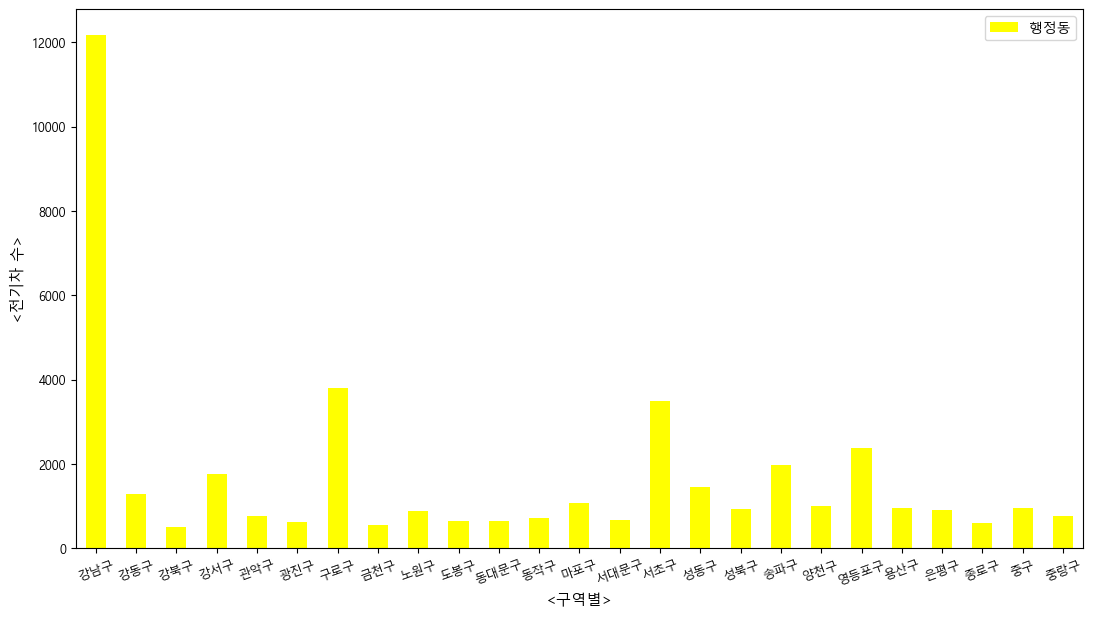

In [109]:
drawGraph(ecDf, 1)

3. 구역별 전기차 충전소 수

In [68]:
locDf = station_app.load_DB('seoul_loc')

In [69]:
locDf.head()

,충전소명,경도,위도
0,DMC래미안e편한세상,37.572233,126.909946
1,DMC센트럴아이파크아파트,37.579362,126.920840
2,DMC아이파크 아파트,37.575441,126.914327
3,e편한세상 금호파크힐스,37.554215,127.022719
4,e편한세상마포리버파크,37.541996,126.943692


In [113]:
# 지도 그리는 함수
def drawMap(data): 
    f = folium.Figure(width=1000, height=700)
    m = folium.Map(location = [37.5666, 126.9774], zoom_start = 13).add_to(f)
    marker_cluster = MarkerCluster().add_to(m) # 현재 지도에 MarkerCluster 적용

    for i in range(len(data)):
        long = data.loc[i,'경도'] 
        lat = data.loc[i,'위도'] 
        name = data.loc[i,'충전소명'] 
        folium.Marker([long, lat], tooltip = name).add_to(marker_cluster)
    return m

In [116]:
drawMap(locDf)